In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
link = "C:/Users/User/Desktop/wine.data"
df = pd.read_csv(link) 
df.columns = ['Class' , 'Alcohol', 'Malic acid' , 'Ash', 'Alcalinity of ash',
                                  'Magnesium','Total phenols','Flavanoids', 'Nonflavanoid phenols',
                                  'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']


df

In [103]:
model = KNeighborsClassifier()

In [105]:
X = df.drop(columns = 'Class')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model.fit(X_train, y_train)
model

KNeighborsClassifier()

In [109]:
pred = model.predict(X_test)
pred

array([1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3], dtype=int64)

In [111]:
acc = accuracy_score(y_test,pred)
acc

0.6666666666666666

In [113]:
kf = KFold( n_splits=5, shuffle=True, random_state=42)
sc = cross_val_score(model, X, y ,cv = 5,  scoring = 'accuracy').mean()
sc_2 = cross_val_score(model,X,y,cv = kf
                       , scoring = 'r2').mean()
sc,sc_2

(0.6836507936507937, 0.25002407005952343)

In [115]:
quality_cross =np.array([])
for i in range(1,10):
    NewModel = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    quality_cross = np.append(quality_cross, cross_val_score(NewModel, X, y, cv = kf, scoring = 'accuracy').mean())
quality_cross

array([0.7352381 , 0.66650794, 0.71809524, 0.65015873, 0.7068254 ,
       0.68952381, 0.72365079, 0.70126984, 0.70714286])

In [116]:
quality_acc = np.array([])
for i in range(1,10):
    NewModel = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    pred = NewModel.predict(X_test)
    quality_acc = np.append(quality_acc,accuracy_score(y_test,pred))
quality_acc

array([0.69444444, 0.69444444, 0.66666667, 0.61111111, 0.66666667,
       0.63888889, 0.72222222, 0.66666667, 0.66666667])

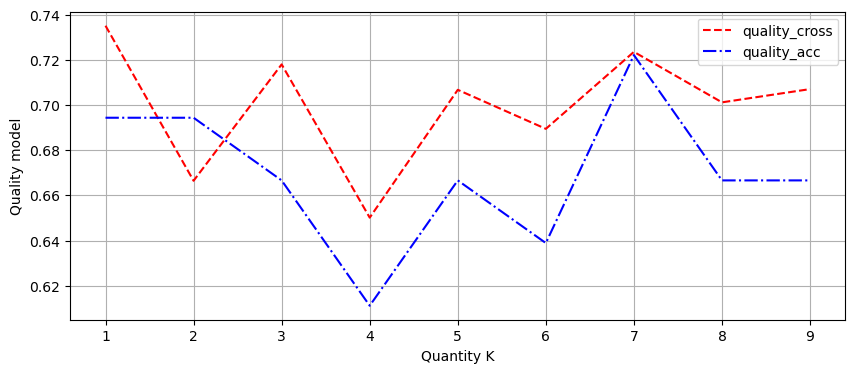

In [143]:
plt.figure(figsize = (10,4))


metka_x = np.arange(1,10,1)

plt.plot(metka_x, quality_cross, color = 'r', linestyle = '--',label = 'quality_cross') 
plt.plot(metka_x, quality_acc, color = 'b', linestyle = '-.',label = 'quality_acc') 

plt.legend()
plt.grid()
plt.xlabel('Quantity K')
plt.ylabel('Quality model')

plt.show()

In [131]:
sc_train = MinMaxScaler().fit(X_train)
sc_test = MinMaxScaler().fit(X_test)

new_train = sc_train.transform(X_train)
new_test = sc_test.transform(X_test)
new_train

array([[0.30409357, 0.45256917, 0.68449198, ..., 0.14285714, 0.16849817,
        0.42938659],
       [0.32748538, 0.94268775, 0.68449198, ..., 0.30769231, 0.15384615,
        0.16904422],
       [0.25730994, 0.48023715, 0.45454545, ..., 0.96703297, 0.57142857,
        0.09129815],
       ...,
       [0.64912281, 0.21146245, 0.71657754, ..., 0.81318681, 0.58974359,
        0.7360913 ],
       [0.25730994, 0.41304348, 0.45989305, ..., 0.67032967, 0.74358974,
        0.0085592 ],
       [0.11988304, 0.19367589, 0.27807487, ..., 0.43956044, 0.42857143,
        0.09771755]])

In [133]:
new_quality_cross = np.array([])

for i in range(1,10):
    New_NewModel = KNeighborsClassifier(n_neighbors = i).fit(new_train,y_train)
    new_quality_cross = np.append(new_quality_cross, cross_val_score(New_NewModel, X, y, cv = kf, scoring = 'accuracy').mean())
new_quality_cross

array([0.7352381 , 0.66650794, 0.71809524, 0.65015873, 0.7068254 ,
       0.68952381, 0.72365079, 0.70126984, 0.70714286])

In [139]:
new_quality_acc = np.array([])

for i in range(1,10):
    NewModel = KNeighborsClassifier(n_neighbors = i).fit(new_train,y_train)
    pred = NewModel.predict(new_test)
    new_quality_acc = np.append(new_quality_acc,accuracy_score(y_test,pred))
new_quality_acc

array([0.91666667, 0.91666667, 0.86111111, 0.86111111, 0.86111111,
       0.86111111, 0.86111111, 0.86111111, 0.86111111])

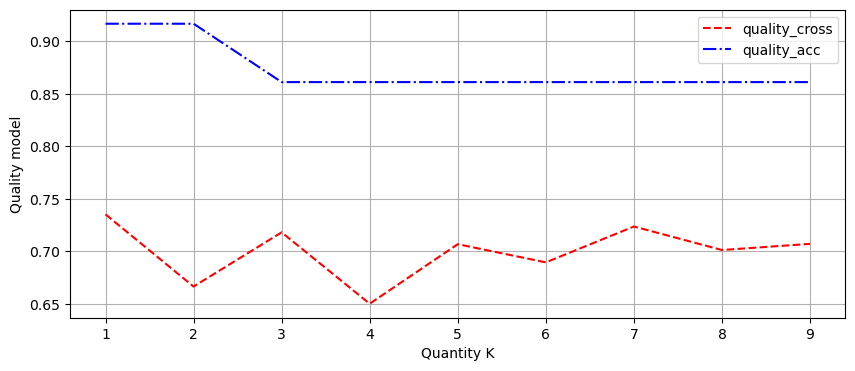

In [145]:
plt.figure(figsize = (10,4))


metka_x = np.arange(1,10,1)

plt.plot(metka_x, new_quality_cross, color = 'r', linestyle = '--',label = 'quality_cross') 
plt.plot(metka_x, new_quality_acc, color = 'b', linestyle = '-.',label = 'quality_acc') 

plt.legend()
plt.grid()
plt.xlabel('Quantity K')
plt.ylabel('Quality model')

plt.show()